In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


# Reading Data

In [2]:
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

Some Columns have objective type; let's to see what they are

In [5]:
df.select_dtypes(include = object).columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

It's better to know unique values of objective columns to use them in the future

In [6]:
print('Chest Pain types: ', df.ChestPainType.unique())
print('Resting ECG types: ', df.RestingECG.unique())
print('Exercise Angina types: ', df.ExerciseAngina.unique())
print('ST Slope types: ', df.ST_Slope.unique())

Chest Pain types:  ['ATA' 'NAP' 'ASY' 'TA']
Resting ECG types:  ['Normal' 'ST' 'LVH']
Exercise Angina types:  ['N' 'Y']
ST Slope types:  ['Up' 'Flat' 'Down']


# EDA

<AxesSubplot:xlabel='ST_Slope', ylabel='ChestPainType'>

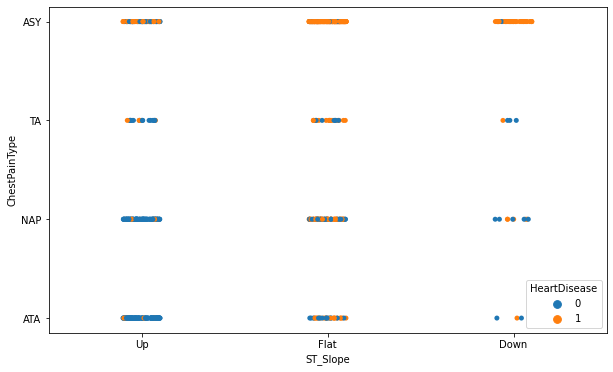

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))
sns.stripplot(x="ST_Slope", y="ChestPainType", hue="HeartDisease", data=df)

<AxesSubplot:xlabel='ST_Slope', ylabel='ExerciseAngina'>

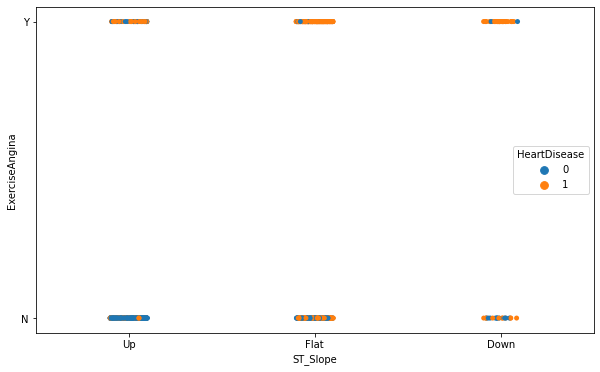

In [8]:
plt.figure(figsize=(10,6))
sns.stripplot(x="ST_Slope", y="ExerciseAngina", hue="HeartDisease", data=df)

<AxesSubplot:xlabel='ST_Slope', ylabel='RestingECG'>

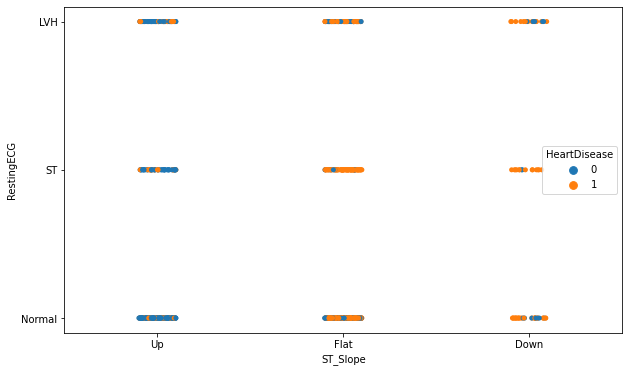

In [9]:
plt.figure(figsize=(10,6))
sns.stripplot(x="ST_Slope", y="RestingECG", hue="HeartDisease", data=df)

<AxesSubplot:xlabel='ST_Slope', ylabel='FastingBS'>

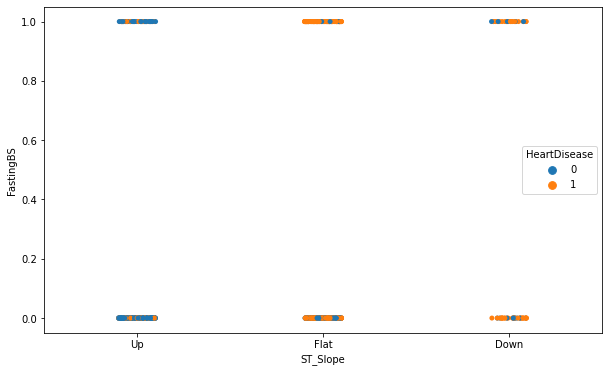

In [10]:
plt.figure(figsize=(10,6))
sns.stripplot(x="ST_Slope", y="FastingBS", hue="HeartDisease", data=df)

<AxesSubplot:xlabel='ST_Slope', ylabel='Sex'>

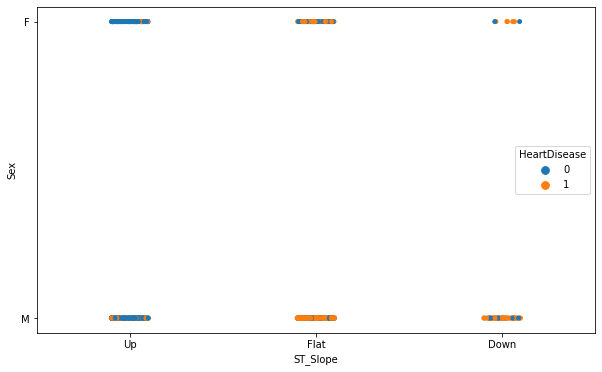

In [11]:
plt.figure(figsize=(10,6))
sns.stripplot(x="ST_Slope", y="Sex", hue="HeartDisease", data=df)

<AxesSubplot:xlabel='ChestPainType', ylabel='ExerciseAngina'>

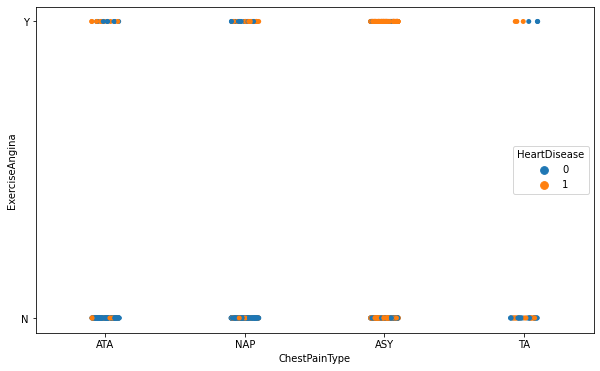

In [12]:
plt.figure(figsize=(10,6))
sns.stripplot(x="ChestPainType", y="ExerciseAngina", hue="HeartDisease", data=df)

<AxesSubplot:xlabel='ChestPainType', ylabel='RestingECG'>

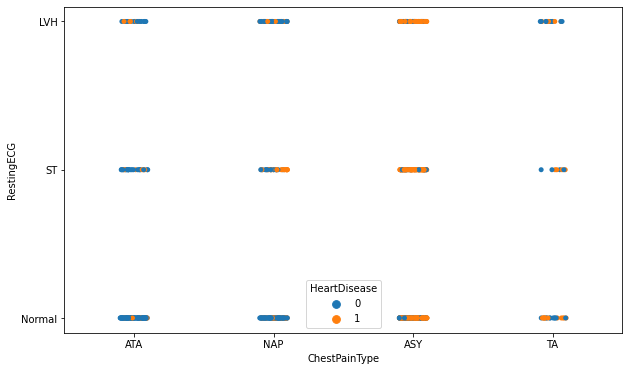

In [13]:
plt.figure(figsize=(10,6))
sns.stripplot(x="ChestPainType", y="RestingECG", hue="HeartDisease", data=df)

<AxesSubplot:xlabel='ChestPainType', ylabel='FastingBS'>

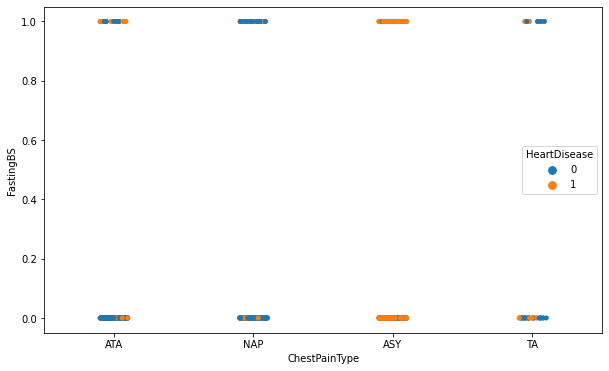

In [14]:
plt.figure(figsize=(10,6))
sns.stripplot(x="ChestPainType", y="FastingBS", hue="HeartDisease", data=df)

<AxesSubplot:xlabel='ChestPainType', ylabel='Sex'>

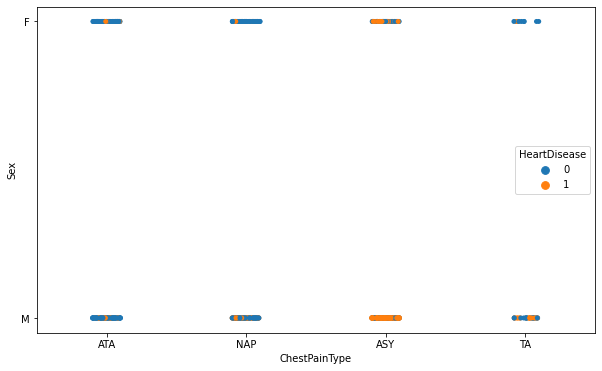

In [15]:
plt.figure(figsize=(10,6))
sns.stripplot(x="ChestPainType", y="Sex", hue="HeartDisease", data=df)

<AxesSubplot:xlabel='RestingECG', ylabel='ExerciseAngina'>

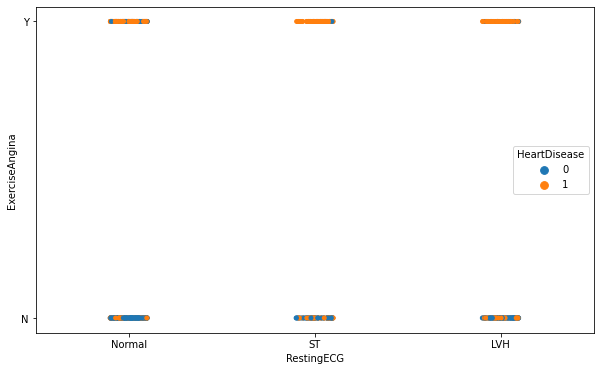

In [16]:
plt.figure(figsize=(10,6))
sns.stripplot(x="RestingECG", y="ExerciseAngina", hue="HeartDisease", data=df)

<AxesSubplot:xlabel='RestingECG', ylabel='Sex'>

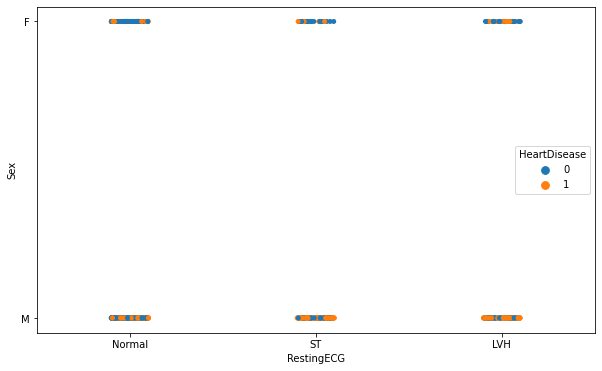

In [17]:
plt.figure(figsize=(10,6))
sns.stripplot(x="RestingECG", y="Sex", hue="HeartDisease", data=df)

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Sex'>

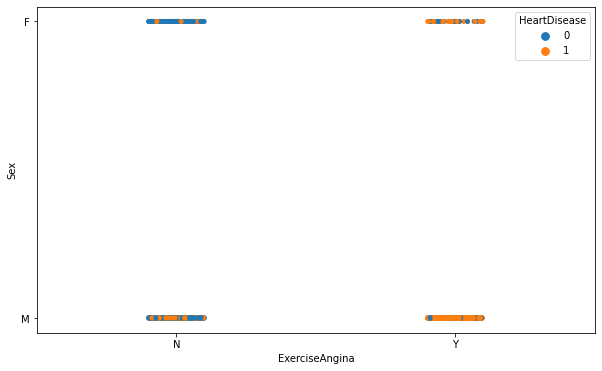

In [18]:
plt.figure(figsize=(10,6))
sns.stripplot(x="ExerciseAngina", y="Sex", hue="HeartDisease", data=df)

<AxesSubplot:xlabel='Oldpeak', ylabel='Age'>

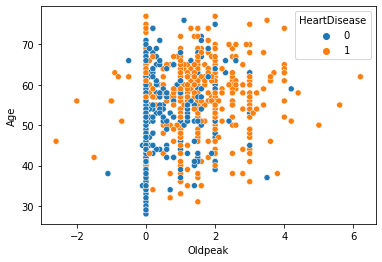

In [19]:
sns.scatterplot(x='Oldpeak', y='Age' , hue = 'HeartDisease' , data = df)

<AxesSubplot:xlabel='Oldpeak', ylabel='RestingBP'>

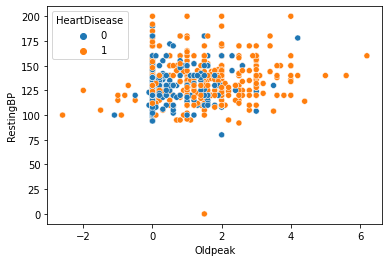

In [20]:
sns.scatterplot(x='Oldpeak', y='RestingBP' , hue = 'HeartDisease' , data = df)

<AxesSubplot:xlabel='Oldpeak', ylabel='Cholesterol'>

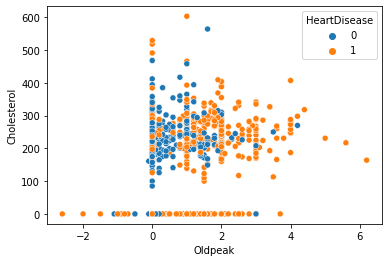

In [21]:
sns.scatterplot(x='Oldpeak', y='Cholesterol' , hue = 'HeartDisease' , data = df)

<AxesSubplot:xlabel='Oldpeak', ylabel='MaxHR'>

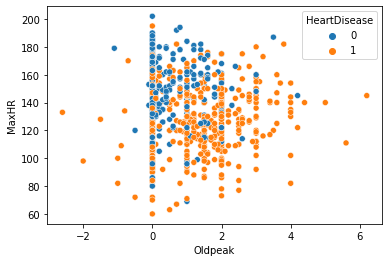

In [22]:
sns.scatterplot(x='Oldpeak', y='MaxHR' , hue = 'HeartDisease' , data = df)

<AxesSubplot:xlabel='Age', ylabel='RestingBP'>

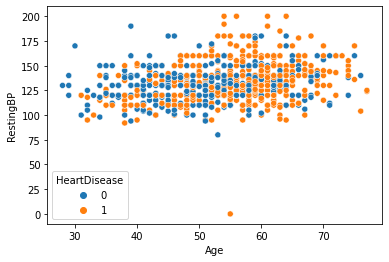

In [23]:
sns.scatterplot(x='Age', y='RestingBP' , hue = 'HeartDisease' , data = df)

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

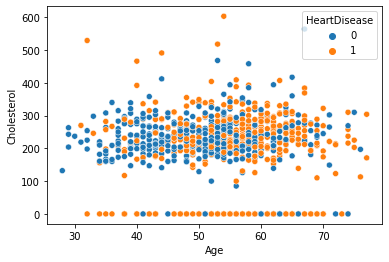

In [24]:
sns.scatterplot(x='Age', y='Cholesterol' , hue = 'HeartDisease' , data = df)

<AxesSubplot:xlabel='Age', ylabel='MaxHR'>

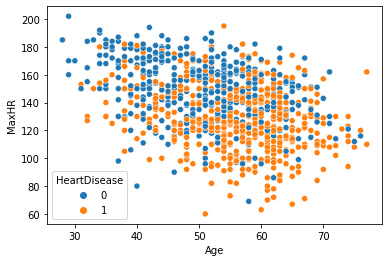

In [25]:
sns.scatterplot(x='Age', y='MaxHR' , hue = 'HeartDisease' , data = df)

<AxesSubplot:xlabel='ChestPainType', ylabel='MaxHR'>

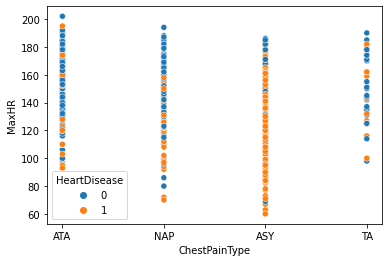

In [26]:
sns.scatterplot(x='ChestPainType', y='MaxHR' , hue = 'HeartDisease' , data = df)

<AxesSubplot:xlabel='ChestPainType', ylabel='Age'>

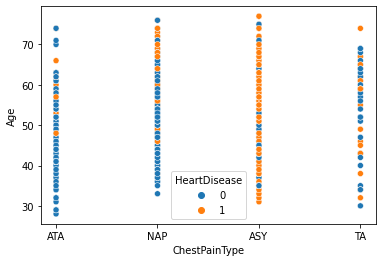

In [27]:
sns.scatterplot(x='ChestPainType', y='Age' , hue = 'HeartDisease' , data = df)

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Age'>

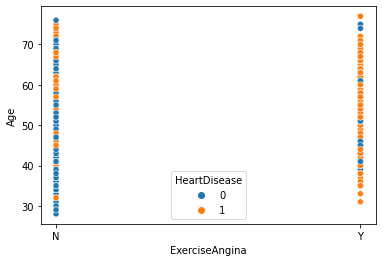

In [28]:
sns.scatterplot(x='ExerciseAngina', y='Age' , hue = 'HeartDisease' , data = df)

<AxesSubplot:xlabel='ST_Slope', ylabel='Age'>

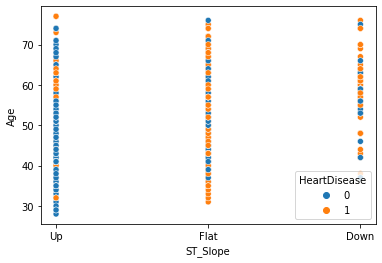

In [29]:
sns.scatterplot(x='ST_Slope', y='Age' , hue = 'HeartDisease' , data = df)

# Data Preprocessing

In [30]:
df = pd.get_dummies(df, drop_first=True)
df

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0        1                  1                  0                 0   
1        0                  0                  1                 0   
2        1                  1                  0                 0   
3        0                  0                  0                 0   
4        1                  0                  1                 0   
..     ...                ...                ...               ...   
913      1                  0                  0                 1   
914      1                  0                  0                 0   
915      1                  0                  0                 0   
916      0                  1                  0                 0   
917      1                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                    1              0                 0              0   
1                    1              0                 0              1   
2                    0              1                 0              0   
3                    1              0                 1              1   
4                    1              0                 0              0   
..                 ...            ...               ...            ...   
913                  1              0                 0              1   
914                  1              0                 0              1   
915                  1              0                 1              1   
916                  0              0                 0              1   
917                  1              0                 0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 16 columns]

The blood pressure of a living person cannot be zero!

In [31]:
df.loc[df.RestingBP == 0]

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
449   55          0            0          0    155      1.5             1   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
449      1                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
449                  1              0                 0              1   

     ST_Slope_Up  
449            0

A zero cholesterol level does not seem logical too, but anyway, I am not a doctor :)

In [32]:
df.loc[df.Cholesterol == 0]

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
293   65        115            0          0     93      0.0             1   
294   32         95            0          1    127      0.7             1   
295   61        105            0          1    110      1.5             1   
296   50        145            0          1    139      0.7             1   
297   57        110            0          1    131      1.4             1   
..   ...        ...          ...        ...    ...      ...           ...   
514   43        122            0          0    120      0.5             1   
515   63        130            0          1    160      3.0             0   
518   48        102            0          1    110      1.0             1   
535   56        130            0          0    122      1.0             1   
536   62        133            0          1    119      1.2             1   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
293      1                  0                  0                 0   
294      1                  0                  0                 1   
295      1                  0                  0                 0   
296      1                  0                  0                 0   
297      1                  0                  0                 0   
..     ...                ...                ...               ...   
514      1                  0                  0                 0   
515      1                  0                  1                 0   
518      1                  0                  1                 0   
535      1                  0                  0                 0   
536      1                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
293                  1              0                 1              1   
294                  1              0                 0              0   
295                  1              0                 1              0   
296                  1              0                 1              1   
297                  0              1                 1              0   
..                 ...            ...               ...            ...   
514                  1              0                 0              0   
515                  0              1                 0              1   
518                  0              1                 1              0   
535                  0              0                 1              1   
536                  0              1                 1              1   

     ST_Slope_Up  
293            0  
294            1  
295            1  
296            0  
297            1  
..           ...  
514            1  
515            0  
518            0  
535            0  
536            0  

[172 rows x 16 columns]

In [33]:
#drop the zombies :)))))
df = df.drop(df.loc[df.RestingBP == 0].index)

X = df.drop(["HeartDisease"], axis=1)
y = df['HeartDisease']

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.3, random_state=42)

# SVM Classifier


Since there are many hyperparameters for each algorithm, we're going to use GridSearchCV tuner to find the best values for the hyperparameters. You can use RandomizedSearchCV too.

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC(random_state=42)
svm_search_space = {
    "C": list(np.random.random_sample((10,))),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "degree": [2, 3, 4],
    "gamma": ['scale', 'auto'] + list(np.random.random_sample((8,)))
}

svm_GS = GridSearchCV(estimator = svm_model,
                      param_grid = svm_search_space,
                      scoring = ["accuracy", "f1"],
                      refit = "f1",
                      cv = 5,
                      verbose = 4)

svm_GS.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[CV 1/5] END C=0.7786855495598582, degree=2, gamma=scale, kernel=linear; accuracy: (test=0.891) f1: (test=0.892) total time=   0.0s
[CV 2/5] END C=0.7786855495598582, degree=2, gamma=scale, kernel=linear; accuracy: (test=0.852) f1: (test=0.859) total time=   0.0s
[CV 3/5] END C=0.7786855495598582, degree=2, gamma=scale, kernel=linear; accuracy: (test=0.852) f1: (test=0.863) total time=   0.0s
[CV 4/5] END C=0.7786855495598582, degree=2, gamma=scale, kernel=linear; accuracy: (test=0.820) f1: (test=0.844) total time=   0.0s
[CV 5/5] END C=0.7786855495598582, degree=2, gamma=scale, kernel=linear; accuracy: (test=0.812) f1: (test=0.826) total time=   0.0s
[CV 1/5] END C=0.7786855495598582, degree=2, gamma=scale, kernel=poly; accuracy: (test=0.822) f1: (test=0.832) total time=   0.0s
[CV 2/5] END C=0.7786855495598582, degree=2, gamma=scale, kernel=poly; accuracy: (test=0.797) f1: (test=0.814) total time=   0.0s
[CV 3/5] END C=

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.7786855495598582, 0.9822733899331142,
                               0.09469104199651013, 0.04922046318351425,
                               0.012313906629457083, 0.9964650448432448,
                               0.9044970310478415, 0.6338711326673168,
                               0.5846297952016856, 0.5320457997464911],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.3569471301347539,
                                   0.5989710905582797, 0.49461708652837877,
                                   0.40268685357433676, 0.0675476412538335,
                                   0.3134387785725923, 0.9339251092901668,
                                   0.9445034984108537],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='f1', scoring=['accuracy', 'f1'], verbose=4)

Let's see what are the best hyperparameters found by GridSearchCV

In [37]:
print(svm_GS.best_params_)
print(svm_GS.best_score_)

{'C': 0.7786855495598582, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.8755797474627605


It is better to save the details of each model in a Pandas DataFrame so that we can evaluate them later. I have sorted them based on the best F1 score.

In [38]:
svm_models_df = pd.DataFrame(svm_GS.cv_results_)
svm_models_df = svm_models_df.sort_values("rank_test_f1")
svm_models_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
2         0.010129      0.000664         0.003885        0.000150  0.778686   
66        0.009463      0.000744         0.003643        0.000122  0.778686   
6         0.013588      0.002499         0.005540        0.001016  0.778686   
82        0.009594      0.000240         0.003696        0.000086  0.778686   
86        0.009695      0.000556         0.003723        0.000153  0.778686   
..             ...           ...              ...             ...       ...   
538       0.015718      0.000129         0.006065        0.000148  0.012314   
462       0.015708      0.000334         0.005945        0.000103   0.04922   
314       0.017483      0.000436         0.006634        0.000121  0.094691   
458       0.015884      0.000164         0.006073        0.000214   0.04922   
542       0.015872      0.000248         0.006037        0.000094  0.012314   

    param_degree param_gamma param_kernel  \
2              2       scale          rbf   
66             3    0.067548          rbf   
6              2        auto          rbf   
82             4       scale          rbf   
86             4        auto          rbf   
..           ...         ...          ...   
538            3    0.494617          rbf   
462            4    0.402687          rbf   
314            3    0.933925          rbf   
458            4    0.494617          rbf   
542            3    0.402687          rbf   

                                                params  split0_test_accuracy  \
2    {'C': 0.7786855495598582, 'degree': 2, 'gamma'...              0.899225   
66   {'C': 0.7786855495598582, 'degree': 3, 'gamma'...              0.899225   
6    {'C': 0.7786855495598582, 'degree': 2, 'gamma'...              0.899225   
82   {'C': 0.7786855495598582, 'degree': 4, 'gamma'...              0.899225   
86   {'C': 0.7786855495598582, 'degree': 4, 'gamma'...              0.899225   
..                                                 ...                   ...   
538  {'C': 0.012313906629457083, 'degree': 3, 'gamm...              0.527132   
462  {'C': 0.04922046318351425, 'degree': 4, 'gamma...              0.527132   
314  {'C': 0.09469104199651013, 'degree': 3, 'gamma...              0.527132   
458  {'C': 0.04922046318351425, 'degree': 4, 'gamma...              0.527132   
542  {'C': 0.012313906629457083, 'degree': 3, 'gamm...              0.527132   

     ...  std_test_accuracy  rank_test_accuracy  split0_test_f1  \
2    ...           0.020991                  28        0.902256   
66   ...           0.020991                  28        0.902256   
6    ...           0.020991                  28        0.902256   
82   ...           0.020991                  28        0.902256   
86   ...           0.020991                  28        0.902256   
..   ...                ...                 ...             ...   
538  ...           0.003495                1153        0.690355   
462  ...           0.003495                1153        0.690355   
314  ...           0.003495                1153        0.690355   
458  ...           0.003495                1153        0.690355   
542  ...           0.003495                1153        0.690355   

     split1_test_f1  split2_test_f1  split3_test_f1  split4_test_f1  \
2          0.884058        0.871429        0.863014        0.857143   
66         0.884058        0.871429        0.863014        0.857143   
6          0.884058        0.871429        0.863014        0.857143   
82         0.884058        0.871429        0.863014        0.857143   
86         0.884058        0.871429        0.863014        0.857143   
..              ...             ...             ...             ...   
538        0.687179        0.687179        0.693878        0.693878   
462        0.687179        0.687179        0.693878        0.693878   
314        0.687179        0.687179        0.693878        0.693878   
458        0.687179        0.687179    

In [39]:
from sklearn.metrics import classification_report

model_pred = svm_GS.predict(X_test)
svm_classifier_report = classification_report(y_test, model_pred , output_dict=True)
svm_results = pd.DataFrame(svm_classifier_report).transpose()
svm_results

precision    recall  f1-score     support
0              0.837838  0.869159  0.853211  107.000000
1              0.915152  0.893491  0.904192  169.000000
accuracy       0.884058  0.884058  0.884058    0.884058
macro avg      0.876495  0.881325  0.878701  276.000000
weighted avg   0.885178  0.884058  0.884427  276.000000

# Logistic Regression Classifier

In [40]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state=42)
LR_search_space = {
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "penalty": ['l1', 'l2', 'elasticnet', None],
    "C": list(np.random.random_sample((10,))),
    "class_weight": ['balanced', None],
    "warm_start": [True, False]
}

LR_GS = GridSearchCV(estimator = LR_model,
                     param_grid = LR_search_space,
                     scoring = ["accuracy", "f1"],
                     refit = "f1",
                     cv = 5,
                     verbose = 4)

LR_GS.fit(X_train, y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[CV 1/5] END C=0.041101138887300714, class_weight=balanced, penalty=l1, solver=newton-cg, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END C=0.041101138887300714, class_weight=balanced, penalty=l1, solver=newton-cg, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END C=0.041101138887300714, class_weight=balanced, penalty=l1, solver=newton-cg, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END C=0.041101138887300714, class_weight=balanced, penalty=l1, solver=newton-cg, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END C=0.041101138887300714, class_weight=balanced, penalty=l1, solver=newton-cg, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END C=0.041101138887300714, class_weight=balanced, penalty=l1, solver=newton-cg, warm_start=False; accuracy: (test=na

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2600 fits failed out of a total of 4000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.041101138887300714, 0.29007909632871165,
                               0.6331367927216522, 0.6116906775530074,
                               0.9846675012269067, 0.2893533967512679,
                               0.9666530491875867, 0.5648792237101334,
                               0.3947488744190263, 0.049523498636682484],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'warm_start': [True, False]},
             refit='f1', scoring=['accuracy', 'f1'], verbose=4)

In [41]:
print(LR_GS.best_params_)
print(LR_GS.best_score_)

{'C': 0.041101138887300714, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg', 'warm_start': True}
0.8659551950921192


In [42]:
LR_models_df = pd.DataFrame(LR_GS.cv_results_)
LR_models_df = LR_models_df.sort_values("rank_test_f1")
LR_models_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time   param_C  \
773       0.005627      0.000727         0.001597        0.000304  0.049523   
774       0.002141      0.000042         0.001341        0.000030  0.049523   
775       0.002113      0.000011         0.001352        0.000033  0.049523   
776       0.004979      0.000122         0.001641        0.000260  0.049523   
777       0.005114      0.000215         0.001467        0.000101  0.049523   
..             ...           ...              ...             ...       ...   
326       0.000191      0.000021         0.000000        0.000000  0.984668   
327       0.000177      0.000011         0.000000        0.000000  0.984668   
340       0.000215      0.000035         0.000000        0.000000  0.984668   
319       0.000194      0.000020         0.000000        0.000000  0.611691   
799       0.000186      0.000013         0.000000        0.000000  0.049523   

    param_class_weight param_penalty param_solver param_warm_start  \
773               None            l2        lbfgs            False   
774               None            l2    liblinear             True   
775               None            l2    liblinear            False   
776               None            l2          sag             True   
777               None            l2          sag            False   
..                 ...           ...          ...              ...   
326           balanced            l1          sag             True   
327           balanced            l1          sag            False   
340           balanced    elasticnet    newton-cg             True   
319               None          None         saga            False   
799               None          None         saga            False   

                                                params  ...  \
773  {'C': 0.049523498636682484, 'class_weight': No...  ...   
774  {'C': 0.049523498636682484, 'class_weight': No...  ...   
775  {'C': 0.049523498636682484, 'class_weight': No...  ...   
776  {'C': 0.049523498636682484, 'class_weight': No...  ...   
777  {'C': 0.049523498636682484, 'class_weight': No...  ...   
..                                                 ...  ...   
326  {'C': 0.9846675012269067, 'class_weight': 'bal...  ...   
327  {'C': 0.9846675012269067, 'class_weight': 'bal...  ...   
340  {'C': 0.9846675012269067, 'class_weight': 'bal...  ...   
319  {'C': 0.6116906775530074, 'class_weight': None...  ...   
799  {'C': 0.049523498636682484, 'class_weight': No...  ...   

     std_test_accuracy  rank_test_accuracy  split0_test_f1  split1_test_f1  \
773           0.022687                   1        0.892308        0.865672   
774           0.022687                   1        0.892308        0.865672   
775           0.022687                   1        0.892308        0.865672   
776           0.022687                   1        0.892308        0.865672   
777           0.022687                   1        0.892308        0.865672   
..                 ...                 ...             ...             ...   
326                NaN                 796             NaN             NaN   
327                NaN                 797             NaN             NaN   
340                NaN                 798             NaN             NaN   
319                NaN                 799             NaN             NaN   
799                NaN                 800             NaN             NaN   

     split2_test_f1  split3_test_f1  split4_test_f1  mean_test_f1  \
773        0.874074        0.857143         0.84058      0.865955   
774        0.874074        0.857143         0.84058      0.865955   
775        0.874074        0.857143         0.84058      0.865955   
776        0.874074        0.857143         0.84058      0.865955   
777        0.874074        0.857143         0.84058      0.865955   
..              ...             ...             ...           ...   
326             NaN             NaN   

In [43]:
model_pred = LR_GS.predict(X_test)
LR_classifier_report = classification_report(y_test, model_pred , output_dict=True)
LR_results = pd.DataFrame(LR_classifier_report).transpose()
LR_results

precision    recall  f1-score     support
0              0.836207  0.906542  0.869955  107.000000
1              0.937500  0.887574  0.911854  169.000000
accuracy       0.894928  0.894928  0.894928    0.894928
macro avg      0.886853  0.897058  0.890905  276.000000
weighted avg   0.898231  0.894928  0.895611  276.000000

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(random_state=42)
RF_search_space = {
    "n_estimators": [100, 200, 400, 500],
    "criterion": ['gini', 'entropy', 'log_loss'],
    "max_features": ['sqrt', None],
    "class_weight": ['balanced', 'balanced_subsample', None],
    "max_depth": [5, 6, 7, 8],
    "bootstrap": [True, False],
    "oob_score": [True, False],
    "warm_start": [True, False]
}

RF_GS = GridSearchCV(estimator = RF_model,
                     param_grid = RF_search_space,
                     scoring = ["accuracy", "f1"],
                     refit = "f1",
                     cv = 5,
                     verbose = 4)

RF_GS.fit(X_train, y_train)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.789) f1: (test=0.803) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.803) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False;

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.822) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.822) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.828) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.828) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False;

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.899) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.899) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.899) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.899) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.789) f1: (test=0.814) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.814) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   1.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False;

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.915) f1: (test=0.920) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.915) f1: (test=0.920) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.915) f1: (test=0.920) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.915) f1: (test=0.920) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.915) f1: (test=0.920) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.915) f1: (test=0.920) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.915) f1: (test=0.920) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.915) f1: (test=0.920) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.915) f1: (test=0.920) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.915) f1: (test=0.920) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.915) f1: (test=0.920) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.915) f1: (test=0.920) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.874) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.874) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.874) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.874) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.881) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.881) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.881) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.881) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.881) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.881) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.881) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   1.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.881) total time=   1.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   1.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.874) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.851) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.874) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.874) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.851) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.874) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.851) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False;

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.859) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.859) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.872) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.789) f1: (test=0.811) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.872) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.872) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.811) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.872) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.872) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.789) f1: (test=0.814) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.872) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.872) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.814) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.872) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.872) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.872) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.872) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   1.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.872) total time=   1.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.872) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.842) total time=   1.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.872) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.872) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.842) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.872) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.871) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, wa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.815) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.815) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.815) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.815) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.876) f1: (test=0.879) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.876) f1: (test=0.879) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.876) f1: (test=0.879) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.876) f1: (test=0.879) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.815) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.815) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.821) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   1.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.821) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.857) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, wa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.897) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.897) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.897) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.897) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.876) f1: (test=0.881) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.842) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.842) total time=   1.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   1.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, wa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.915) f1: (test=0.920) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.915) f1: (test=0.920) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.915) f1: (test=0.920) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.915) f1: (test=0.920) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.915) f1: (test=0.920) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.915) f1: (test=0.920) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.915) f1: (test=0.920) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.915) f1: (test=0.920) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.843) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.851) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.815) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.828) f1: (test=0.843) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.843) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.851) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.815) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.843) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.843) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.828) f1: (test=0.843) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.843) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.843) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.842) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.842) total time=   1.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.842) total time=   1.6s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   1.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.842) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.872) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.872) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.872) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, wa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.872) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.872) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.872) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.872) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.872) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.872) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.851) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.851) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.845) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.849) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.828) f1: (test=0.845) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.845) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.849) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.845) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.849) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.849) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   1.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.824) total time=   1.6s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.6s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   1.6s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.5s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.824) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, war

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; ac

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; ac

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; ac

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accur

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; a

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=Fal

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.812) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.812) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   1.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   1.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.879) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.879) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.879) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.879) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.789) f1: (test=0.814) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.814) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.822) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.815) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.822) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.815) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.828) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.828) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   1.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   1.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   1.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   1.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.899) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.899) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.899) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.899) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.899) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.899) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.899) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.899) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   1.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.822) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.822) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.789) f1: (test=0.814) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.814) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   1.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   1.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.874) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.874) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.874) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.874) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.879) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.822) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.879) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.879) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.822) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.879) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.879) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.789) f1: (test=0.814) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.879) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.879) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.814) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.879) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   1.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.7s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.7s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   1.7s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.887) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   1.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.887) total time=   1.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   1.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.879) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.822) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.827) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.879) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.879) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.822) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.827) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.879) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.872) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.789) f1: (test=0.814) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.872) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.872) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.814) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.872) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.866) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.866) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.866) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.866) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.866) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.7s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.7s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.866) total time=   1.8s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estim

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.866) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.819) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   1.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   1.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.866) total time=   1.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.899) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.899) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.899) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.899) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   1.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.876) f1: (test=0.881) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.821) total time=   1.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   1.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.821) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   1.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.832) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.842) total time=   1.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.842) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   1.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.7s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   1.7s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.7s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.836) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   1.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   1.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   1.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.874) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.874) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.861) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.874) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.861) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.874) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.874) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.874) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.874) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.874) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   1.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   1.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   1.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.7s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   1.7s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.7s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   1.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   1.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.872) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.868) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.872) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.868) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.852) f1: (test=0.872) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.855) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.872) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.855) total time=   0.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   1.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.9s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.9s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.9s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.9s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   1.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.889) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.843) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.851) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.889) total time=   0.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.828) f1: (test=0.843) total time=   0.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.843) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.851) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.3s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.889) total time=   0.3s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.843) total time=   0.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.835) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.7s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.7s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.820) f1: (test=0.835) total time=   0.7s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.7s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.835) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.6s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.6s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.835) total time=   0.6s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.6s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.828) f1: (test=0.841) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   1.4s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.4s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.828) f1: (test=0.841) total time=   1.4s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   1.4s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.841) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   1.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.841) total time=   1.3s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   1.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   1.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=0.820) f1: (test=0.824) total time=   1.8s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.8s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   1.8s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.8s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.844) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.824) total time=   1.5s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   1.5s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   1.5s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   1.5s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_es

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_esti

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_es

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_esti

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_es

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_esti

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_es

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_esti

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_es

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None,

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_e

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=True, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.871) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=F

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.886) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.886) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.7s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.7s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.7s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.839) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.839) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.758) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.839) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.839) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.847) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.832) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.758) f1: (test=0.748) total time=   0.5s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   0.5s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.847) total time=   0.5s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.832) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.847) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.832) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.758) f1: (test=0.748) total time=   0.9s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   0.9s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.847) total time=   0.9s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.832) total time=   0.9s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.847) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.832) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.758) f1: (test=0.748) total time=   1.1s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   1.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.847) total time=   1.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.832) total time=   1.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.859) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.859) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=F

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.6s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.860) f1: (test=0.862) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.851) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.795) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.812) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.860) f1: (test=0.862) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.851) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.860) f1: (test=0.862) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.851) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.795) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.812) total time=   0.5s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.860) f1: (test=0.862) total time=   0.5s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.851) total time=   0.5s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.860) f1: (test=0.862) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.843) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.795) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.821) total time=   1.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.860) f1: (test=0.862) total time=   1.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.843) total time=   1.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   1.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.860) f1: (test=0.862) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.843) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.795) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.812) total time=   1.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.860) f1: (test=0.862) total time=   1.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.843) total time=   1.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   1.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.871) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=F

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.6s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.874) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.874) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.800) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.851) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.734) f1: (test=0.761) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.769) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.800) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.851) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.833) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.800) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.851) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.734) f1: (test=0.761) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.769) total time=   0.5s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.800) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.851) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.833) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.800) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.851) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.734) f1: (test=0.761) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.773) f1: (test=0.779) total time=   1.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.800) total time=   1.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.851) total time=   1.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.833) total time=   1.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.800) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.851) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.734) f1: (test=0.761) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.773) f1: (test=0.779) total time=   1.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.800) total time=   1.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.851) total time=   1.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.833) total time=   1.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.861) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.853) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.861) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=F

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.861) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.7s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.7s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.7s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.837) f1: (test=0.842) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.824) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.772) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.800) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.837) f1: (test=0.842) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.824) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.837) f1: (test=0.842) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.840) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.772) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.5s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.837) f1: (test=0.842) total time=   0.5s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   0.5s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.840) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.837) f1: (test=0.842) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.840) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.772) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   1.1s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.837) f1: (test=0.842) total time=   1.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   1.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.840) total time=   1.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.837) f1: (test=0.842) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.831) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.772) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   1.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.837) f1: (test=0.842) total time=   1.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   1.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.831) total time=   1.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=Fa

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=Fals

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.815) total time=   0.7s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.820) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.839) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.833) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.803) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.820) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.839) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.820) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.839) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.833) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.803) total time=   0.5s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   0.5s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.820) total time=   0.5s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.839) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.820) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.839) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.833) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.803) total time=   1.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   1.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.820) total time=   1.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.839) total time=   1.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.820) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.839) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.833) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.803) total time=   1.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   1.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.820) total time=   1.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.839) total time=   1.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.863) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=Fals

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.821) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.827) total time=   0.6s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.825) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.829) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.815) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.778) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.825) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.829) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.815) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.825) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.829) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.815) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.778) total time=   0.5s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.825) total time=   0.5s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.829) total time=   0.5s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.815) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.825) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.823) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.815) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.778) total time=   1.1s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.825) total time=   1.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.823) total time=   1.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.815) total time=   1.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.825) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.823) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.815) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.778) total time=   1.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.825) total time=   1.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.823) total time=   1.4s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.815) total time=   1.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.855) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.857) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.855) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=Fals

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.842) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.7s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.7s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.7s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.9s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.833) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.815) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.829) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.791) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.833) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.781) f1: (test=0.803) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.815) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.833) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.809) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.829) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.791) total time=   0.6s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.833) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.789) f1: (test=0.809) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.833) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.814) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.829) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.791) total time=   1.1s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.833) total time=   1.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.797) f1: (test=0.814) total time=   1.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   1.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.833) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.814) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.829) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.791) total time=   1.4s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.833) total time=   1.4s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.797) f1: (test=0.814) total time=   1.4s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   1.4s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.863) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=Fals

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.861) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.7s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.7s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.806) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.827) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.769) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.773) f1: (test=0.772) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.806) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.781) f1: (test=0.803) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.827) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.806) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.827) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.750) f1: (test=0.778) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.773) f1: (test=0.772) total time=   0.6s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.806) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.781) f1: (test=0.803) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.827) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.806) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.809) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.827) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.769) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.773) f1: (test=0.772) total time=   1.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.806) total time=   1.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.789) f1: (test=0.809) total time=   1.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.827) total time=   1.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.806) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.809) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.827) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.769) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.773) f1: (test=0.772) total time=   1.4s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.806) total time=   1.4s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.789) f1: (test=0.809) total time=   1.5s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.827) total time=   1.5s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=True, warm_start=False

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=False;

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=True, warm_start=True; 

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_sta

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_star

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.871) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqr

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.886) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.886) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   0.6s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.7s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.9s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.839) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.839) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.758) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.839) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.839) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.847) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.832) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.758) f1: (test=0.748) total time=   0.5s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   0.5s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.847) total time=   0.5s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.832) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.847) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.832) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.758) f1: (test=0.748) total time=   0.9s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   0.9s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.847) total time=   0.9s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.832) total time=   0.9s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.847) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.832) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.758) f1: (test=0.748) total time=   1.1s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   1.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.847) total time=   1.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.832) total time=   1.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=5, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.859) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.859) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqr

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.6s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.860) f1: (test=0.862) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.851) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.795) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.812) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.860) f1: (test=0.862) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.851) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.860) f1: (test=0.862) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.851) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.795) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.812) total time=   0.5s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.860) f1: (test=0.862) total time=   0.5s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.851) total time=   0.5s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.860) f1: (test=0.862) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.843) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.795) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.821) total time=   1.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.860) f1: (test=0.862) total time=   1.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.843) total time=   1.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   1.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.860) f1: (test=0.862) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.843) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.795) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.812) total time=   1.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.860) f1: (test=0.862) total time=   1.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.843) total time=   1.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   1.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=6, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.857) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.884) f1: (test=0.887) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.857) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.871) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqr

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.6s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.874) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.874) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.800) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.851) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.734) f1: (test=0.761) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.769) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.800) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.851) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.833) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.800) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.851) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.734) f1: (test=0.761) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.766) f1: (test=0.769) total time=   0.5s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.800) total time=   0.5s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.851) total time=   0.5s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.833) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.800) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.851) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.734) f1: (test=0.761) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.773) f1: (test=0.779) total time=   1.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.800) total time=   1.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.851) total time=   1.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.833) total time=   1.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.800) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.851) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.833) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.734) f1: (test=0.761) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.773) f1: (test=0.779) total time=   1.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.800) total time=   1.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.851) total time=   1.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.833) total time=   1.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=7, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.861) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.853) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.861) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqr

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.861) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.889) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.7s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.7s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.7s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.889) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.871) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.871) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=sqrt

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.837) f1: (test=0.842) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.824) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.772) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.800) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.837) f1: (test=0.842) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.824) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.837) f1: (test=0.842) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.840) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.772) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.5s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.837) f1: (test=0.842) total time=   0.5s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   0.5s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.840) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.837) f1: (test=0.842) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.840) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.772) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.818) total time=   1.1s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.837) f1: (test=0.842) total time=   1.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   1.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.840) total time=   1.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.837) f1: (test=0.842) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.849) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.831) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.772) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   1.4s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.837) f1: (test=0.842) total time=   1.4s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.849) total time=   1.4s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.828) f1: (test=0.831) total time=   1.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=gini, max_depth=8, max_features=None

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.865) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, m

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.815) total time=   0.6s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.863) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.892) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.809) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.852) f1: (test=0.863) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.892) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.820) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.839) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.833) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.803) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.820) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.839) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.820) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.839) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.833) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.803) total time=   0.5s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   0.5s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.820) total time=   0.5s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.839) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.820) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.839) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.833) total time=   1.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.803) total time=   1.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   1.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.820) total time=   1.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.839) total time=   1.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.797) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.820) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.839) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.833) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.803) total time=   1.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.797) total time=   1.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.820) total time=   1.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.839) total time=   1.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=5, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.824) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.884) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.863) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, m

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.821) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.827) total time=   0.7s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.883) f1: (test=0.891) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.9s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.883) f1: (test=0.891) total time=   0.8s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.825) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.829) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.815) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.778) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.825) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.829) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.815) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.825) total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.829) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.815) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.778) total time=   0.6s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.825) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.829) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.815) total time=   0.5s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.825) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.823) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.815) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.778) total time=   1.1s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.825) total time=   1.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.823) total time=   1.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.815) total time=   1.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.825) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.823) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.815) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.826) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.778) total time=   1.4s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.825) total time=   1.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.823) total time=   1.4s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.815) total time=   1.4s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=6, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.855) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.857) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.836) f1: (test=0.855) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, m

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.852) f1: (test=0.871) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.842) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.907) f1: (test=0.912) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.876) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.865) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.851) total time=   0.7s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.907) f1: (test=0.912) total time=   0.7s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.876) total time=   0.7s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.857) total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.838) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.8s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.8s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.833) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.815) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.829) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.791) total time=   0.4s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.833) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.781) f1: (test=0.803) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.812) f1: (test=0.815) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.833) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.809) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.829) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.791) total time=   0.6s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.833) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.789) f1: (test=0.809) total time=   0.6s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.833) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.814) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   1.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.829) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.791) total time=   1.1s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.833) total time=   1.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.797) f1: (test=0.814) total time=   1.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   1.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.829) f1: (test=0.833) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.797) f1: (test=0.814) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.805) f1: (test=0.809) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.812) f1: (test=0.829) total time=   1.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.791) total time=   1.4s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.829) f1: (test=0.833) total time=   1.4s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.797) f1: (test=0.814) total time=   1.4s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.805) f1: (test=0.809) total time=   1.4s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=7, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.844) f1: (test=0.863) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, m

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.899) f1: (test=0.904) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.859) f1: (test=0.870) total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.861) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.836) f1: (test=0.844) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.899) f1: (test=0.904) total time=   0.4s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.859) f1: (test=0.870) total time=   0.4s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.4s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.828) f1: (test=0.836) total time=   0.7s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.7s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.7s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.7s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.891) f1: (test=0.896) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.867) f1: (test=0.878) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.844) f1: (test=0.863) total time=   0.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.830) total time=   0.8s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.891) f1: (test=0.896) total time=   0.9s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.867) f1: (test=0.878) total time=   0.9s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.875) f1: (test=0.882) total time=   0.9s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.806) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.827) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.769) total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=0.773) f1: (test=0.772) total time=   0.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.806) total time=   0.3s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.781) f1: (test=0.803) total time=   0.3s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.827) total time=   0.3s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.806) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.781) f1: (test=0.803) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.827) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.750) f1: (test=0.778) total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=0.773) f1: (test=0.772) total time=   0.6s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.806) total time=   0.6s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.781) f1: (test=0.803) total time=   0.7s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.827) total time=   0.6s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.806) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.809) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.827) total time=   1.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.769) total time=   1.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=0.773) f1: (test=0.772) total time=   1.3s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.806) total time=   1.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.789) f1: (test=0.809) total time=   1.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.827) total time=   1.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.806) f1: (test=0.806) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.789) f1: (test=0.809) total time=   1.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.820) f1: (test=0.827) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.742) f1: (test=0.769) total time=   1.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=0.773) f1: (test=0.772) total time=   1.5s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.806) f1: (test=0.806) total time=   1.6s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.789) f1: (test=0.809) total time=   1.5s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=0.820) f1: (test=0.827) total time=   1.5s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=entropy, max_depth=8, ma

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=5, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=100, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=N

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=Non

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=6, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=7, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=s

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=True, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqr

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=sqrt, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=100, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=200, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.1s
[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=400, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


[CV 5/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=True; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 1/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 2/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 3/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=None, n_estimators=500, oob_score=False, warm_start=False; accuracy: (test=nan) f1: (test=nan) total time=   0.2s
[CV 4/5] END bootstrap=False, class_weight=balanced_subsample, criterion=log_loss, max_depth=8, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5760 fits failed out of a total of 11520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1920 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/jobl

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['sqrt', None],
                         'n_estimators': [100, 200, 400, 500],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             refit='f1', scoring=['accuracy', 'f1'], verbose=4)

In [45]:
print(RF_GS.best_params_)
print(RF_GS.best_score_)

{'bootstrap': False, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 400, 'oob_score': False, 'warm_start': True}
0.8790397588384955


In [46]:
RF_models_df = pd.DataFrame(RF_GS.cv_results_)
RF_models_df = RF_models_df.sort_values("rank_test_f1")
RF_models_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1994       0.548753      0.003813         0.053032        0.000969   
1995       0.551332      0.003033         0.051767        0.002032   
1222       0.295227      0.001524         0.027206        0.000341   
1606       0.293480      0.003293         0.026952        0.000332   
1607       0.295359      0.007723         0.028794        0.004150   
...             ...           ...              ...             ...   
1284       0.001196      0.000447         0.000000        0.000000   
1281       0.000801      0.000017         0.000000        0.000000   
1280       0.001169      0.000469         0.000000        0.000000   
1296       0.001463      0.000730         0.000000        0.000000   
2303       0.196282      0.001766         0.000000        0.000000   

     param_bootstrap  param_class_weight param_criterion param_max_depth  \
1994           False                None            gini               7   
1995           False                None            gini               7   
1222           False            balanced            gini               7   
1606           False  balanced_subsample            gini               7   
1607           False  balanced_subsample            gini               7   
...              ...                 ...             ...             ...   
1284           False            balanced         entropy               5   
1281           False            balanced         entropy               5   
1280           False            balanced         entropy               5   
1296           False            balanced         entropy               5   
2303           False                None        log_loss               8   

     param_max_features param_n_estimators  ... std_test_accuracy  \
1994               sqrt                400  ...          0.023096   
1995               sqrt                400  ...          0.023096   
1222               sqrt                200  ...          0.023096   
1606               sqrt                200  ...          0.023096   
1607               sqrt                200  ...          0.023096   
...                 ...                ...  ...               ...   
1284               sqrt                200  ...               NaN   
1281               sqrt                100  ...               NaN   
1280               sqrt                100  ...               NaN   
1296               None                100  ...               NaN   
2303               None                500  ...               NaN   

     rank_test_accuracy split0_test_f1  split1_test_f1  split2_test_f1  \
1994                  1       0.911765        0.871429        0.890511   
1995                  1       0.911765        0.871429        0.890511   
1222                  1       0.911765        0.869565        0.890511   
1606                  1       0.911765        0.869565        0.890511   
1607                  1       0.911765        0.869565        0.890511   
...                 ...            ...             ...             ...   
1284               2300            NaN             NaN             NaN   
1281               2301            NaN             NaN             NaN   
1280               2302            NaN             NaN             NaN   
1296               2303            NaN             NaN             NaN   
2303               2304            NaN             NaN             NaN   

      split3_test_f1  split4_test_f1  mean_test_f1  std_test_f1  rank_test_f1  
1994        0.870748        0.850746      0.879040     0.020638             1  
1995        0.870748        0.850746      0.879040     0.020638             1  
1222        0.870748        0.850746      0.878667     0.020789             3  
1606        0.870748        0.850746      0.878667     0.020789             3  
1607        0.870748        0.850746      0.878667     0.020789             3  
...              ...             ...           ...    

In [47]:
model_pred = RF_GS.predict(X_test)
RF_classifier_report = classification_report(y_test, model_pred , output_dict=True)
RF_results = pd.DataFrame(RF_classifier_report).transpose()
RF_results

precision    recall  f1-score     support
0              0.849057  0.841121  0.845070  107.000000
1              0.900000  0.905325  0.902655  169.000000
accuracy       0.880435  0.880435  0.880435    0.880435
macro avg      0.874528  0.873223  0.873863  276.000000
weighted avg   0.880250  0.880435  0.880330  276.000000

# ANN

**1. Preprocessing:**

In my opinion, it's better to use 'MinMaxScaler' instead of 'StandardScaler' in the ANNs.

In [48]:
from sklearn.preprocessing import MinMaxScaler

#drop the zombies again :)))))
df = df.drop(df.loc[df.RestingBP == 0].index)

X = df.drop(["HeartDisease"], axis=1)
y = df['HeartDisease']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.3, random_state=42)

**2. Training and Tuning:**

To find best number of hidden layers and number of neurons in each one, I use keras tuner specifically 'Hyperband' search.

In [50]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [51]:
tuner = kt.Hyperband(
    hypermodel=build_model,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    hyperband_iterations=1,
    seed=42,
    overwrite=True)

2022-08-25 23:00:43.165500: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [52]:
tuner.search(x=X_train, 
             y=y_train, 
             validation_split=0.2, 
             callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)],
             epochs=30)

Trial 90 Complete [00h 00m 03s]
val_accuracy: 0.8139534592628479

Best val_accuracy So Far: 0.8449612259864807
Total elapsed time: 00h 03m 44s


In [53]:
#Showing 10 best trials:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 128
units_1: 160
learning_rate: 0.0001
units_2: 224
units_3: 416
units_4: 160
units_5: 480
units_6: 192
units_7: 320
units_8: 32
units_9: 352
units_10: 224
units_11: 192
units_12: 288
units_13: 224
units_14: 96
units_15: 96
units_16: 160
units_17: 320
units_18: 160
units_19: 512
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
Score: 0.8449612259864807
Trial summary
Hyperparameters:
num_layers: 4
units_0: 224
units_1: 256
learning_rate: 0.0001
units_2: 96
units_3: 96
units_4: 288
units_5: 224
units_6: 320
units_7: 192
units_8: 480
units_9: 480
units_10: 288
units_11: 96
units_12: 32
units_13: 64
units_14: 352
units_15: 320
units_16: 64
units_17: 384
units_18: 160
units_19: 288
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.8449612259864807
Trial summary
Hyperparameters:
num_layers: 9
units_0: 96
units_1: 288
l

We've found the best values for hyperparametes; So we can train the model

In [54]:
best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)

model_hisotry = model.fit(x=X_train,
                          y=y_train,
                          validation_split=0.2,
                          epochs=30)

Epoch 1/30
16/16 [==============================] - 1s 24ms/step - loss: 0.6757 - accuracy: 0.6758 - val_loss: 0.6582 - val_accuracy: 0.8062
Epoch 2/30
16/16 [==============================] - 0s 8ms/step - loss: 0.6328 - accuracy: 0.8379 - val_loss: 0.6114 - val_accuracy: 0.8217
Epoch 3/30
16/16 [==============================] - 0s 10ms/step - loss: 0.5719 - accuracy: 0.8398 - val_loss: 0.5449 - val_accuracy: 0.8140
Epoch 4/30
16/16 [==============================] - 0s 8ms/step - loss: 0.4903 - accuracy: 0.8477 - val_loss: 0.4701 - val_accuracy: 0.7984
Epoch 5/30
16/16 [==============================] - 0s 8ms/step - loss: 0.4118 - accuracy: 0.8457 - val_loss: 0.4197 - val_accuracy: 0.8062
Epoch 6/30
16/16 [==============================] - 0s 8ms/step - loss: 0.3696 - accuracy: 0.8516 - val_loss: 0.4035 - val_accuracy: 0.8140
Epoch 7/30
16/16 [==============================] - 0s 8ms/step - loss: 0.3459 - accuracy: 0.8594 - val_loss: 0.3978 - val_accuracy: 0.8140
Epoch 8/30
16/16 [

Although we've got hyperparameters but we dont know best number of ephoc; So we should get it and train the final model

In [55]:
val_acc_per_epoch = model_hisotry.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch = ', best_epoch)

Best epoch =  2


In [56]:
final_model = tuner.hypermodel.build(best_hp)

final_model_history = final_model.fit(x=X_train,
                                      y=y_train,
                                      validation_split=0.2, 
                                      epochs=best_epoch)

Epoch 1/2
16/16 [==============================] - 1s 23ms/step - loss: 0.6735 - accuracy: 0.7031 - val_loss: 0.6498 - val_accuracy: 0.8062
Epoch 2/2
16/16 [==============================] - 0s 7ms/step - loss: 0.6173 - accuracy: 0.8457 - val_loss: 0.5929 - val_accuracy: 0.7984


**3. Testing the final model**

In [57]:
final_model.evaluate(x = X_test,
                     y = y_test,
                     verbose=1)

9/9 [==============================] - 0s 3ms/step - loss: 0.5809 - accuracy: 0.8478


[0.5809381604194641, 0.8478260636329651]

In [58]:
model_preds = final_model.predict(X_test)
for i in range(len(model_preds)):
    if model_preds[i] >= 0.5:
        model_preds[i] = 1
    elif model_preds[i] < 0.5:
        model_preds[i] = 0
        
ANN_classifier_report = classification_report(y_test, model_preds , output_dict=True)
ANN_results = pd.DataFrame(ANN_classifier_report).transpose()
ANN_results

precision    recall  f1-score     support
0              0.798165  0.813084  0.805556  107.000000
1              0.880240  0.869822  0.875000  169.000000
accuracy       0.847826  0.847826  0.847826    0.847826
macro avg      0.839202  0.841453  0.840278  276.000000
weighted avg   0.848421  0.847826  0.848078  276.000000

# Results

According to the classifiers results, it can be concluded that the best results have been obtained by the following models, respectively:
1. Logistic Regression
2. SVM
3. Random Forest
4. ANN

In [63]:
LR_results

precision    recall  f1-score     support
0              0.836207  0.906542  0.869955  107.000000
1              0.937500  0.887574  0.911854  169.000000
accuracy       0.894928  0.894928  0.894928    0.894928
macro avg      0.886853  0.897058  0.890905  276.000000
weighted avg   0.898231  0.894928  0.895611  276.000000

In [64]:
svm_results

precision    recall  f1-score     support
0              0.837838  0.869159  0.853211  107.000000
1              0.915152  0.893491  0.904192  169.000000
accuracy       0.884058  0.884058  0.884058    0.884058
macro avg      0.876495  0.881325  0.878701  276.000000
weighted avg   0.885178  0.884058  0.884427  276.000000

In [65]:
RF_results

precision    recall  f1-score     support
0              0.849057  0.841121  0.845070  107.000000
1              0.900000  0.905325  0.902655  169.000000
accuracy       0.880435  0.880435  0.880435    0.880435
macro avg      0.874528  0.873223  0.873863  276.000000
weighted avg   0.880250  0.880435  0.880330  276.000000

In [66]:
ANN_results

precision    recall  f1-score     support
0              0.798165  0.813084  0.805556  107.000000
1              0.880240  0.869822  0.875000  169.000000
accuracy       0.847826  0.847826  0.847826    0.847826
macro avg      0.839202  0.841453  0.840278  276.000000
weighted avg   0.848421  0.847826  0.848078  276.000000